In [123]:
import sys
sys.path.append('../')
from scipy import stats
import pandas as pd
import seaborn as sns; sns.set(style='whitegrid', context='paper', 
                               rc={'font.size': 7, 
                                   'axes.titlesize': 9,
                                   'axes.labelsize': 8,
                                   'xtick.labelsize': 7,
                                   'ytick.labelsize': 7,
                                   'legend.fontsize' : 8,
                                   'legend.markerscale': 0.7,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt
from plotting import annotate_corr

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
id_columns = ['architecture', 'task', 'kind', 'source', 'layer']

---
# Figure 1 - Dimensionality vs. encoding performance

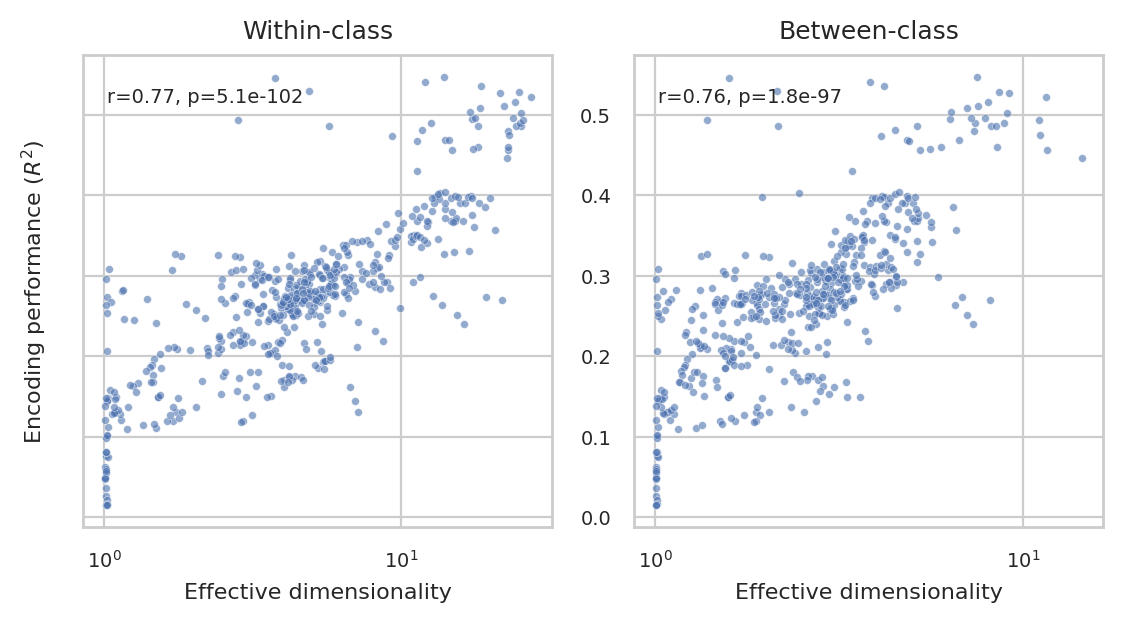

In [72]:
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

fig, axs = plt.subplots(1, 2, figsize=(5.5, 3))

sns.scatterplot(data=data, x='within-concept dimensionality (mean)', y='score', alpha=0.6, s=8, ax=axs[0])
axs[0].set(title='Within-class', xlabel='Effective dimensionality', ylabel=r'Encoding performance ($R^2$)', yticklabels=[], xscale='log')
annotate_corr(data, x='within-concept dimensionality (mean)', y='score', ax=axs[0])

sns.scatterplot(data=data, x='between-concept dimensionality', y='score', alpha=0.6, s=8, ax=axs[1])
axs[1].set(title='Between-class', xlabel='Effective dimensionality', ylabel=None, xscale='log')
annotate_corr(data, x='between-concept dimensionality', y='score', ax=axs[1])

plt.savefig('saved/results_01_ED.png', dpi=300)
plt.show()

---
# Figure 2 - Dimensionality vs. layer depth

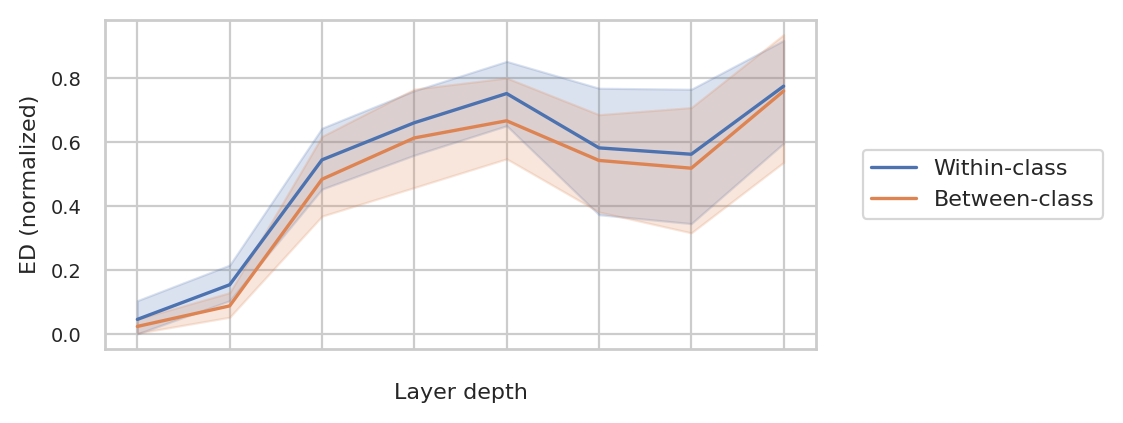

In [85]:
dataset = 'imagenet'
data = pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv')
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data = data[(data.kind != 'Untrained') & (data.architecture == 'ResNet18')]

normed_metrics = data.groupby(['architecture', 'task', 'kind', 'source'])\
                     .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
normed_metrics = normed_metrics[['between-concept dimensionality', 'within-concept dimensionality (mean)']]
normed_metrics.columns = [c + ' normed' for c in normed_metrics.columns]
data = pd.concat([data, normed_metrics], axis=1)

data = data.melt(id_vars=id_columns, 
                 value_vars=['within-concept dimensionality (mean) normed', 'between-concept dimensionality normed'], 
                 var_name='metric', value_name='metric_value')

fig, ax = plt.subplots(figsize=(5.5, 2))

sns.lineplot(data=data, x='layer', y='metric_value', hue='metric', ax=ax)
ax.set(xlabel='Layer depth', ylabel='ED (normalized)', xticklabels=[])

ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', labels=['Within-class', 'Between-class'])

plt.savefig('saved/results_02_depth.png', dpi=300)
plt.show()

---
# Figure 3 - Dimensionality vs. encoding performance by layer

In [135]:
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

def corr_layer(x):
    r_within, p_within = stats.spearmanr(x['score'], x['within-concept dimensionality (mean)'])
    r_between, p_between = stats.spearmanr(x['score'], x['between-concept dimensionality'])
    return pd.DataFrame({'r_score_dim': [r_within, r_between], 'p_score_dim': [p_within, p_between], 'dim_type': ['within', 'between']})

by_layer = data.groupby(['architecture', 'layer'])['score', 'within-concept dimensionality (mean)', 'between-concept dimensionality']
by_layer = by_layer.apply(corr_layer)
by_layer

/home/eric/anaconda3/envs/bs/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


r_score_dim   p_score_dim dim_type
architecture layer                                              
ResNet18     layer1.0.relu 0     0.587912  3.458606e-02   within
                           1     0.120879  6.940473e-01  between
             layer1.1.relu 0     0.631868  2.051604e-02   within
                           1     0.302198  3.156084e-01  between
             layer2.0.relu 0     0.609890  2.687783e-02   within
                           1     0.752747  2.982233e-03  between
             layer2.1.relu 0     0.741758  3.701314e-03   within
                           1     0.417582  1.556748e-01  between
             layer3.0.relu 0     0.390110  1.875741e-01   within
                           1     0.642857  1.779245e-02  between
             layer3.1.relu 0     0.362637  2.233157e-01   within
                           1     0.379121  2.014061e-01  between
             layer4.0.relu 0     0.241758  4.261755e-01   within
                           1     0.065934  8.305424e-01  between
             layer4.1.relu 0     0.489011  8.991308e-02   within
                           1     0.489011  8.991308e-02  between
ResNet50     layer1.0.relu 0     0.659487  2.476060e-04   within
                           1     0.113162  5.820368e-01  between
             layer1.1.relu 0     0.741538  1.459909e-05   within
                           1     0.213675  2.945853e-01  between
             layer1.2.relu 0     0.885812  1.790276e-09   within
                           1     0.412650  3.616927e-02  between
             layer2.0.relu 0     0.945299  3.577174e-13   within
                           1     0.667009  1.980208e-04  between
             layer2.1.relu 0     0.930940  5.442340e-12   within
                           1     0.748376  1.100323e-05  between
             layer2.2.relu 0     0.868718  8.712442e-09   within
                           1     0.809231  5.582643e-07  between
             layer2.3.relu 0     0.840000  8.008602e-08   within
                           1     0.807179  6.275522e-07  between
             layer3.0.relu 0     0.745641  1.233387e-05   within
                           1     0.752479  9.246479e-06  between
             layer3.1.relu 0     0.747692  1.132330e-05   within
                           1     0.829060  1.668306e-07  between
             layer3.2.relu 0     0.775726  3.228345e-06   within
                           1     0.850940  3.633167e-08  between
             layer3.3.relu 0     0.792821  1.371950e-06   within
                           1     0.837265  9.669621e-08  between
             layer3.4.relu 0     0.779145  2.736889e-06   within
                           1     0.803761  7.603580e-07  between
             layer3.5.relu 0     0.770940  4.048953e-06   within
                           1     0.793504  1.323624e-06  between
             layer4.0.relu 0     0.703932  6.000973e-05   within
                           1     0.673162  1.641653e-04  between
             layer4.1.relu 0     0.604786  1.064733e-03   within
                           1     0.633504  5.123676e-04  between
             layer4.2.relu 0     0.634872  4.939331e-04   within
                           1     0.659487  2.476060e-04  between

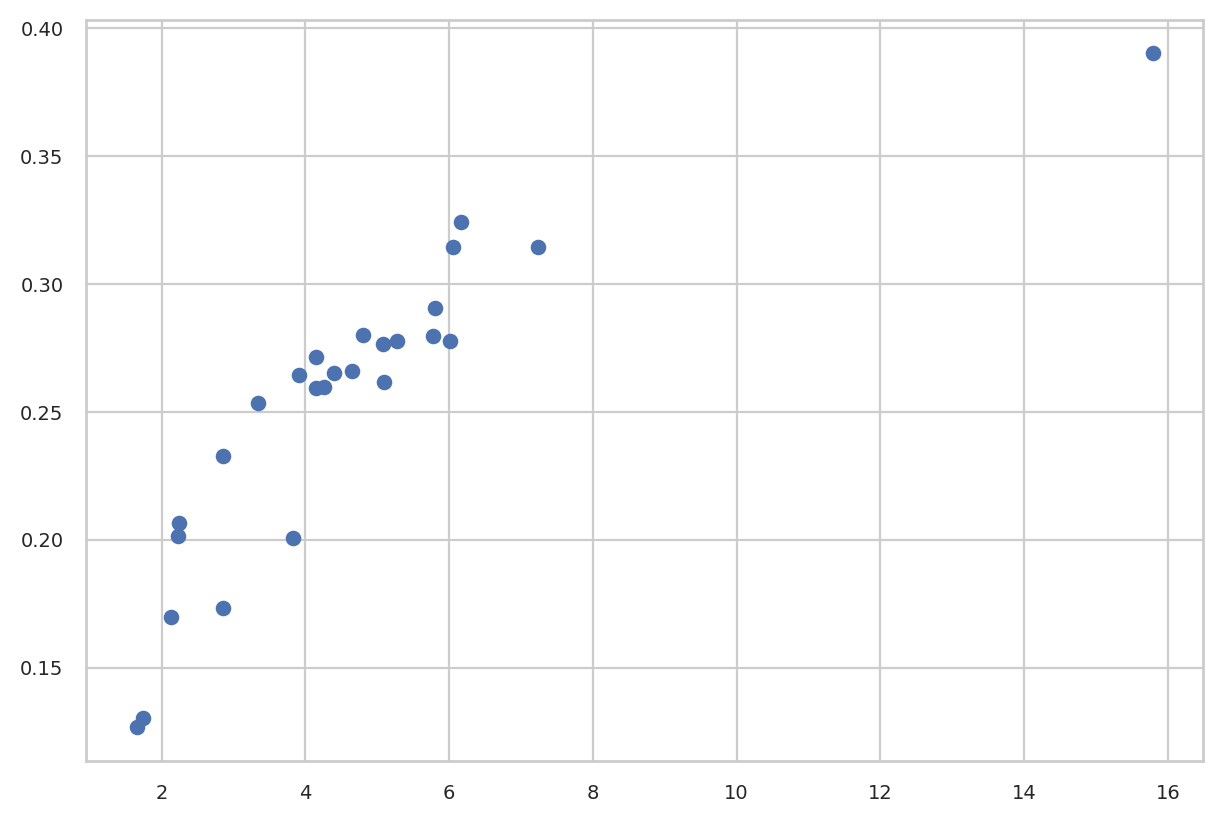

In [143]:
t = data[(data.architecture == 'ResNet50') & (data.layer == 'layer2.0.relu')][['score', 'within-concept dimensionality (mean)']]
stats.spearmanr(t['within-concept dimensionality (mean)'], t['score'])

plt.scatter(t['within-concept dimensionality (mean)'], t['score'])

In [144]:
data[(data.architecture == 'ResNet50') & (data.layer == 'layer2.0.relu')].max()

layer                                                layer2.0.relu
score                                                     0.390074
score_error                                               0.006009
architecture                                              ResNet50
task                                    Vanishing Point Estimation
kind                                                     Untrained
source                                                   Taskonomy
between-concept dimensionality                            5.014831
between-concept radius                                   14.146023
bias (mean)                                               0.030519
bias (std)                                                0.255366
other signal-noise-overlap (mean)                        17.945354
other signal-noise-overlap (std)                         15.140783
self signal-noise-overlap (mean)                         17.761267
self signal-noise-overlap (std)                          14.65

---
# Figure 4 - Training

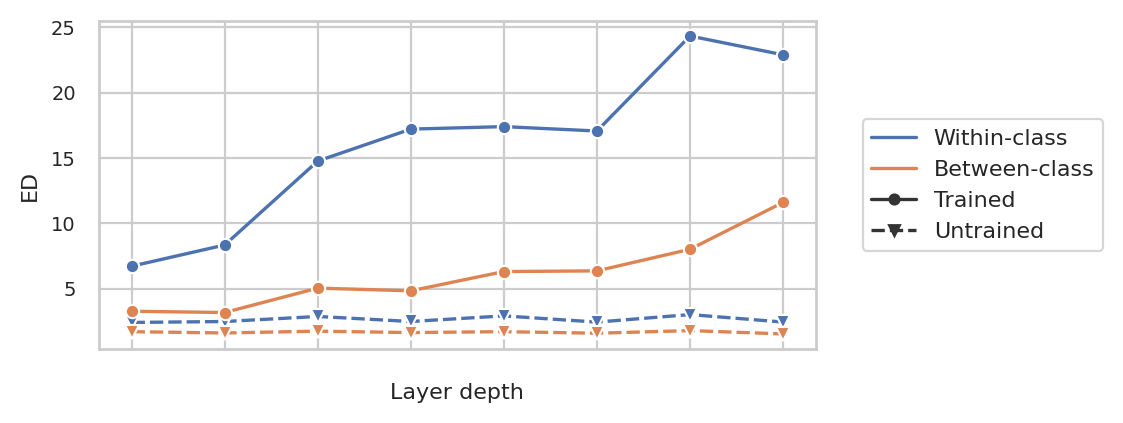

In [116]:
dataset = 'imagenet'
data = pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv')
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data = data[(data.source == 'PyTorch') & (data.architecture == 'ResNet18')]

data = data.melt(id_vars=id_columns, 
                 value_vars=['within-concept dimensionality (mean)', 'between-concept dimensionality'], 
                 var_name='metric', value_name='metric_value')

fig, ax = plt.subplots(figsize=(5.5, 2))

sns.lineplot(data=data, x='layer', y='metric_value', hue='metric', style='kind',
             markers=['o', 'v'], style_order=['Supervised', 'Untrained'],
             ax=ax)
ax.set(xlabel='Layer depth', ylabel='ED', xticklabels=[])

handles, _ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', 
          labels=['Within-class', 'Between-class', 'Trained', 'Untrained'], 
          handles=[handles[1], handles[2], handles[4], handles[5]])

plt.savefig('saved/results_04_training.png', dpi=300)
plt.show()